<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/main3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


In [2]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

In [3]:
train_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)

In [7]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

In [4]:
img_dim = 200
batch_size = 32

In [5]:
train_ds = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 5163 images belonging to 2 classes.


In [8]:
test_ds = test_generator.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


In [9]:
x_train, y_train = train_ds.next()

print(x_train.shape)
print(y_train.shape)

(32, 200, 200, 3)
(32,)


In [12]:
# lookup at some train images

# plt.figure(figsize=(9, 5))
# for i in range(2*5):
#   plt.subplot(2, 5, i+1)
#   plt.imshow(x_train[i])
#   plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
#   plt.axis('off')
# plt.tight_layout()
# plt.show()

In [18]:
model = keras.Sequential()
model.add(layers.Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (img_dim, img_dim, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(units = 128 , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 100, 100, 64)    

In [20]:
history = model.fit(train_ds, validation_data=test_ds, batch_size=batch_size, epochs=10)

Epoch 1/10
162/162 [==============================] - 2932s 18s/step - loss: 0.5496 - accuracy: 0.8348 - val_loss: 0.7193 - val_accuracy: 0.6183
Epoch 2/10
162/162 [==============================] - 132s 817ms/step - loss: 0.2826 - accuracy: 0.8960 - val_loss: 6.1991 - val_accuracy: 0.3817
Epoch 3/10
162/162 [==============================] - 129s 798ms/step - loss: 0.2471 - accuracy: 0.9130 - val_loss: 2.2555 - val_accuracy: 0.3817
Epoch 4/10
162/162 [==============================] - 133s 820ms/step - loss: 0.2277 - accuracy: 0.9291 - val_loss: 0.7188 - val_accuracy: 0.3817
Epoch 5/10
162/162 [==============================] - 138s 850ms/step - loss: 0.1876 - accuracy: 0.9334 - val_loss: 1.4098 - val_accuracy: 0.3817
Epoch 6/10
162/162 [==============================] - 136s 839ms/step - loss: 0.1772 - accuracy: 0.9421 - val_loss: 0.6667 - val_accuracy: 0.6150
Epoch 7/10
162/162 [==============================] - 134s 822ms/step - loss: 0.1475 - accuracy: 0.9456 - val_loss: 0.7437 - 

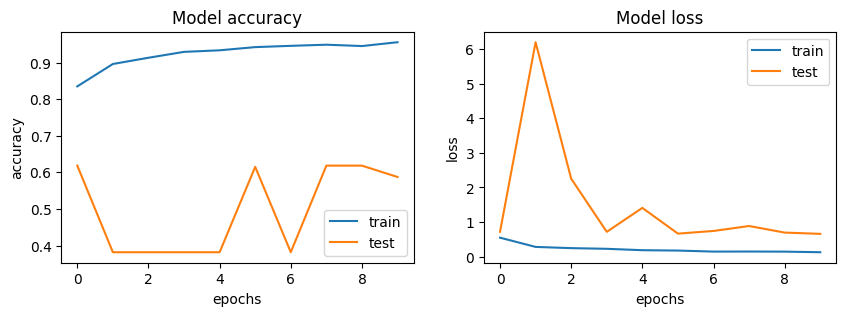

In [21]:
# diagrams

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

In [22]:
# picking up some sample images for prediction

sample = test_ds.next()

x_test, y_test = sample

print(x_test.shape)
print(y_test.shape)

(32, 200, 200, 3)
(32,)


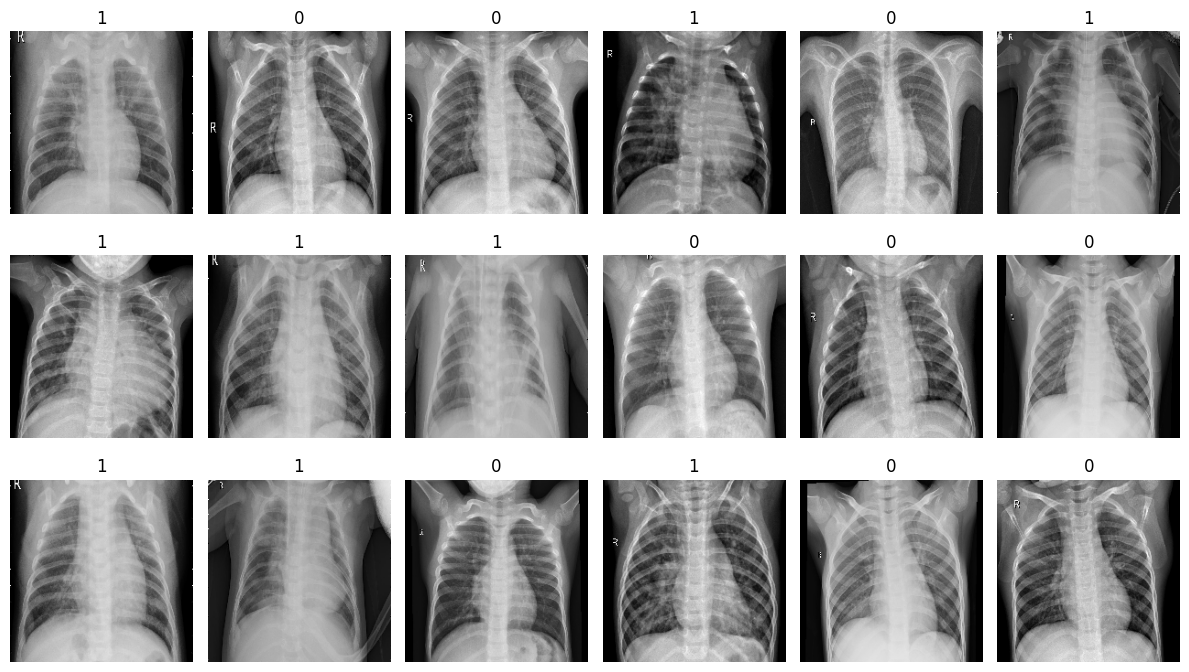

In [23]:
# lookup at 18 sample images

plt.figure(figsize=(12, 7))
for i in range(3*6):
  plt.subplot(3, 6, i+1)
  plt.imshow(x_test[i])
  plt.title(int(y_test[i]))
  plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
pred = model.predict(x_test)

for i in pred[:18]:
  print(0 if i < 0.5 else 1, end=', ')

1/1 [==============================] - 0s 189ms/step
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# ************************************************************************************************************

In [ ]:
# below code is working fine. DON'T RUN AGAIN --------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


In [ ]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1. / 255,
    zoom_range=0.3,
    vertical_flip=True
)

In [ ]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

In [ ]:
img_dim = 200
batch_size = 32

In [ ]:
train_ds = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 5163 images belonging to 2 classes.


In [ ]:
val_ds = test_generator.flow_from_directory(
    val_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
test_ds = test_generator.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


In [ ]:
x_train, y_train = train_ds.next()

print(x_train.shape)
print(y_train.shape)

(32, 200, 200, 3)
(32,)


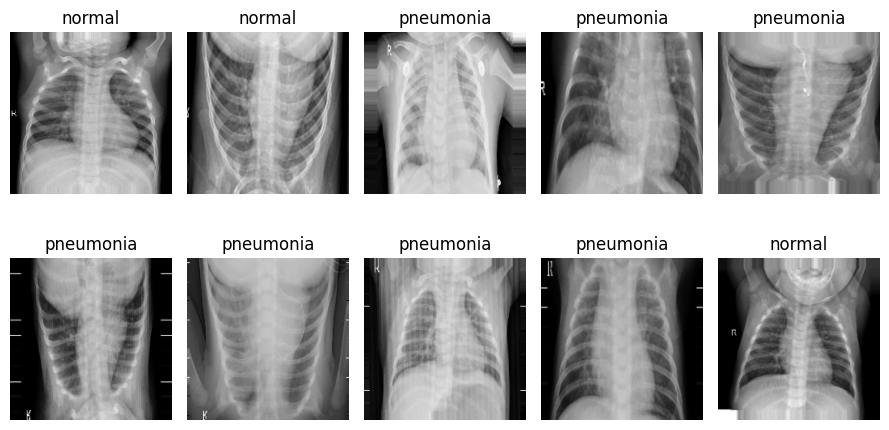

In [ ]:
# lookup at some train images

plt.figure(figsize=(9, 5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
input = layers.Input(shape=(img_dim, img_dim, 3))

# First conv block
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(rate=0.2)(x)

# Fifth conv block
x = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(rate=0.2)(x)

# FC layer
x = layers.Flatten()(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(rate=0.7)(x)
x = layers.Dense(units=128, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(units=64, activation='relu')(x)
x = layers.Dropout(rate=0.3)(x)

# Output layer
output = layers.Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 separable_conv2d_8 (Separab  (None, 100, 100, 32)     688       
 leConv2D)                                                       
                                                                 
 separable_conv2d_9 (Separab  (None, 100, 100, 32)     1344  

In [ ]:
model.fit(train_ds, validation_data=test_ds, batch_size=batch_size, epochs=10)

Epoch 1/10
162/162 [==============================] - 119s 731ms/step - loss: 0.1905 - accuracy: 0.9287 - val_loss: 1.0845 - val_accuracy: 0.4715
Epoch 2/10
162/162 [==============================] - 116s 714ms/step - loss: 0.1773 - accuracy: 0.9400 - val_loss: 0.6739 - val_accuracy: 0.5856
Epoch 3/10
162/162 [==============================] - 115s 708ms/step - loss: 0.1827 - accuracy: 0.9299 - val_loss: 0.5340 - val_accuracy: 0.7977
Epoch 4/10
162/162 [==============================] - 114s 703ms/step - loss: 0.1680 - accuracy: 0.9382 - val_loss: 1.7625 - val_accuracy: 0.3817
Epoch 5/10
162/162 [==============================] - 114s 706ms/step - loss: 0.1612 - accuracy: 0.9411 - val_loss: 0.8580 - val_accuracy: 0.8108
Epoch 6/10
162/162 [==============================] - 118s 729ms/step - loss: 0.1618 - accuracy: 0.9405 - val_loss: 1.2637 - val_accuracy: 0.5106
Epoch 7/10
162/162 [==============================] - 115s 708ms/step - loss: 0.1573 - accuracy: 0.9413 - val_loss: 0.5701 -

In [ ]:
model.evaluate(test_ds, batch_size=batch_size)

20/20 [==============================] - 14s 693ms/step - loss: 0.2532 - accuracy: 0.9070


[0.25322651863098145, 0.9070146679878235]

In [ ]:
sample = test_ds.next()

In [ ]:
x_test, y_test = sample

print(x_test.shape)
print(y_test.shape)

(32, 200, 200, 3)
(32,)


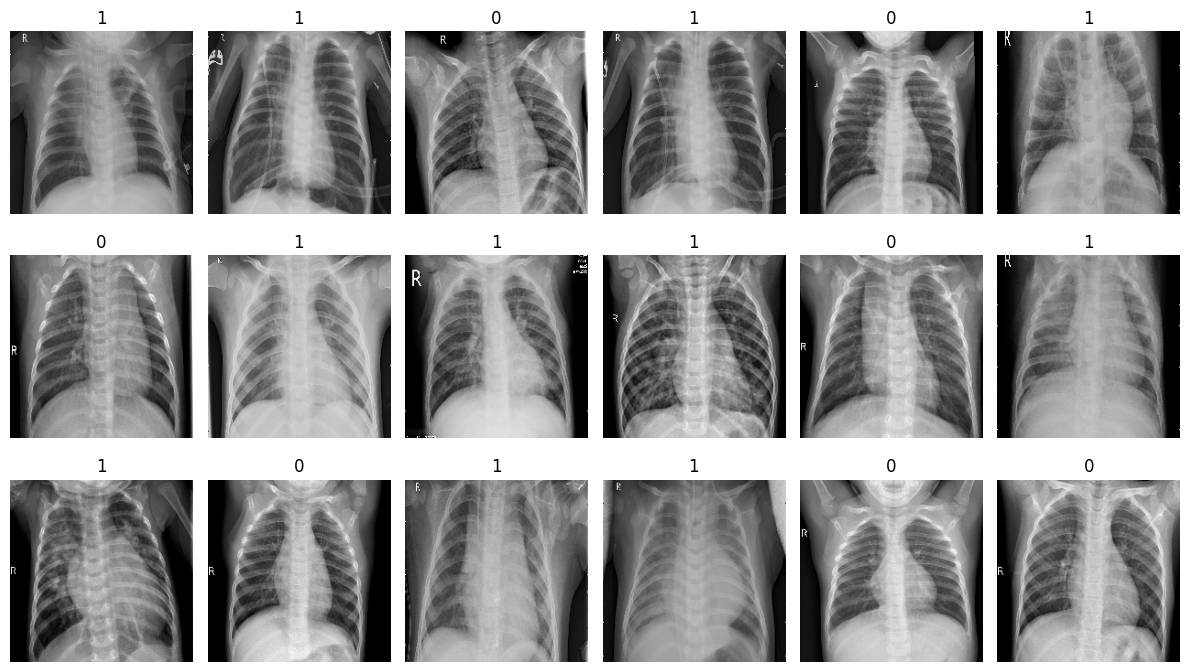

In [ ]:
# lookup at some test images

plt.figure(figsize=(12, 7))
for i in range(3*6):
  plt.subplot(3, 6, i+1)
  plt.imshow(x_test[i])
  plt.title(int(y_test[i]))
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(x_test)

for i in pred[:18]:
  print(0 if i < 0.5 else 1, end=', ')

1/1 [==============================] - 0s 39ms/step
1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [ ]:
# 0 - normal
# 1 - pneumonia